# Positional Encoding: Resultados obtenidos

En este notebook, se analizan los resultados obtenidos para diferentes propuestas de positional encoding en el modelo de Informer para la predicción en series temporales. Para ello, los algoritmos han sido ejecutados previamente, y salvado sus métricas en un fichero csv, el cual será empleado para el cálculo de las mejoras relativas y la representación gráfica de las métricas.

Comenzaremos el análisis mediante la lectura de los ficheros, que hacen referencia a las 3 alternativas a comparar, siendo nuestra referencia el modelo de Informer original.

## HPC (freq = minutos)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lectura de ficheros
df_original = pd.read_csv("Informer_PE.csv")
print("Informer Original")
display(df_original)

df_sin_pe = pd.read_csv("Informer_NoPE.csv")
print("Informer Sin PE")
display(df_sin_pe)

df_fft = pd.read_csv("Informer_FFT.csv")
print("Informer con PE basado en FFT")
display(df_fft)

Informer Original


,Métrica,Valor
0,MAE,0.305472
1,MSE,0.378791
2,RMSE,0.615404
3,MAPE,2.164158
4,MSPE,1005.066427


Informer Sin PE


,Métrica,Valor
0,MAE,0.372206
1,MSE,0.472345
2,RMSE,0.687251
3,MAPE,2.330153
4,MSPE,1111.673543


Informer con PE basado en FFT


,Métrica,Valor
0,MAE,0.349108
1,MSE,0.415932
2,RMSE,0.644924
3,MAPE,2.442069
4,MSPE,1211.573730


### Análisis numérico

Comenzaremos analizando la mejora (o empeoramiento) relativo de los modelos sin PE y mediante FFT contra el modelo original de Informer. Para ello, estudiaremos de manera relativa el porcentaje de diferencia entre pares de modelos.

In [2]:
# Fusión de los dataframe
df_temp = pd.merge(df_original, df_sin_pe, on="Métrica", suffixes=("_PE", "_NoPE"))
df_comparacion = pd.merge(df_temp, df_fft, on="Métrica")

df_fft_renamed = df_fft.rename(columns=lambda x: x if x == "Métrica" else f"{x}_FFT")
df_comparacion = pd.merge(df_temp, df_fft_renamed, on="Métrica")

# Mostramos resultado
display(df_comparacion)

,Métrica,Valor_PE,Valor_NoPE,Valor_FFT
0,MAE,0.305472,0.372206,0.349108
1,MSE,0.378791,0.472345,0.415932
2,RMSE,0.615404,0.687251,0.644924
3,MAPE,2.164158,2.330153,2.442069
4,MSPE,1005.066427,1111.673543,1211.573730


In [3]:
# Calculamos la mejora porcentual de PE sobre FFT
df_comparacion["% PE sobre FFT"] = ((df_comparacion["Valor_FFT"] - df_comparacion["Valor_PE"]) / df_comparacion["Valor_FFT"]) * 100
df_comparacion["% PE sobre NoPE"] = ((df_comparacion["Valor_NoPE"] - df_comparacion["Valor_PE"]) / df_comparacion["Valor_NoPE"]) * 100

# Mostramos la tabla
display(df_comparacion)

# Calculamos el promedio de mejora
promedio_mejora_fft = df_comparacion["% PE sobre FFT"].mean()
promedio_mejora_nope = df_comparacion["% PE sobre NoPE"].mean()
print("\nPromedio de mejora de PE sobre FFT: {:.2f}%".format(promedio_mejora_fft))
print("\nPromedio de mejora de PE sobre NoPE: {:.2f}%".format(promedio_mejora_nope))

,Métrica,Valor_PE,Valor_NoPE,Valor_FFT,% PE sobre FFT,% PE sobre NoPE
0,MAE,0.305472,0.372206,0.349108,12.499257,17.929177
1,MSE,0.378791,0.472345,0.415932,8.929438,19.806257
2,RMSE,0.615404,0.687251,0.644924,4.577299,10.454231
3,MAPE,2.164158,2.330153,2.442069,11.380116,7.123747
4,MSPE,1005.066427,1111.673543,1211.573730,17.044551,9.589786



Promedio de mejora de PE sobre FFT: 10.89%

Promedio de mejora de PE sobre NoPE: 12.98%


### Representación gráfica
Para apreciarlo de manera visual, podemos representar las diferentes métricas en un gráfico de barras y apreciar el rendimiento entre alternativas.

In [4]:
df_comparacion.drop(columns=["% PE sobre NoPE", "% PE sobre FFT"], inplace=True)

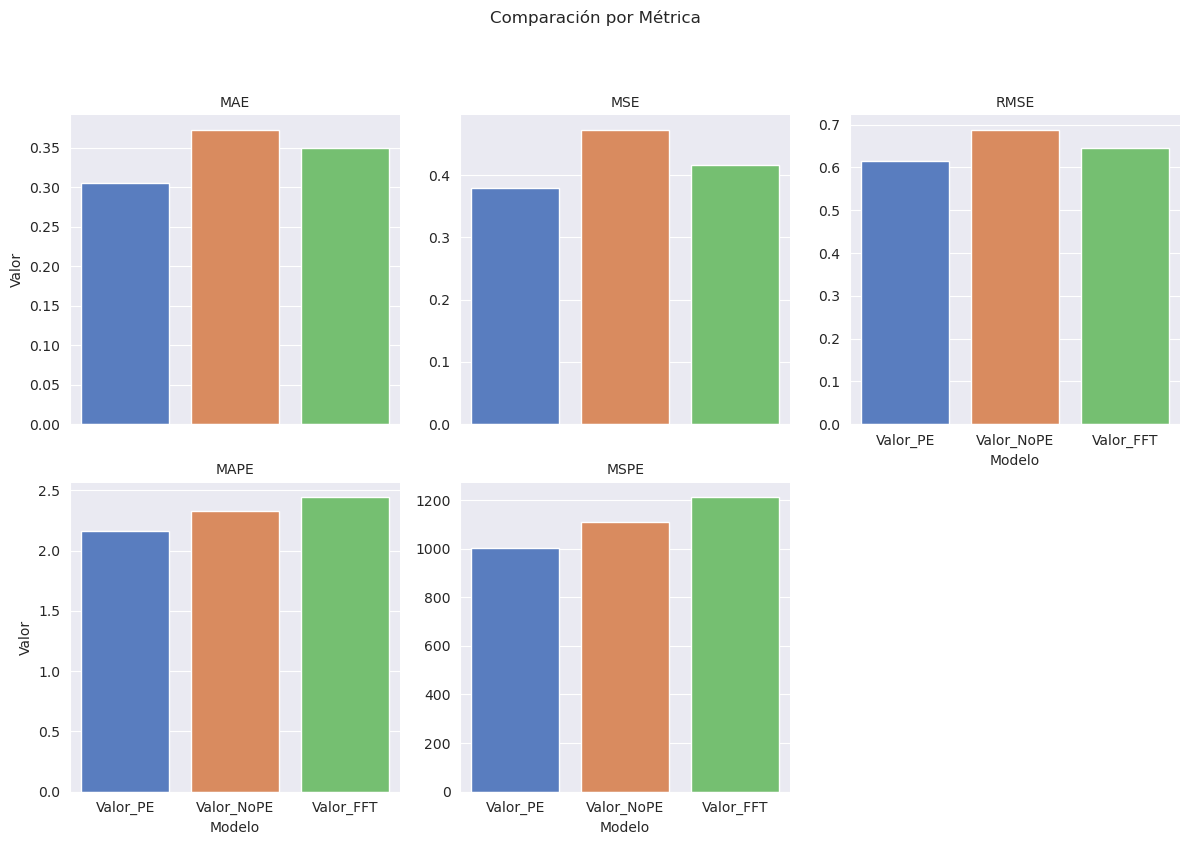

In [5]:
import seaborn as sns

# Transformamos a formato largo para representar
df_long = df_comparacion.melt(id_vars="Métrica", var_name="Modelo", value_name="Valor")

g = sns.FacetGrid(df_long, col="Métrica", col_wrap=3, sharey=False, height=4)
g.map_dataframe(sns.barplot, x="Modelo", y="Valor", hue="Modelo", palette="muted", legend=False)

g.set_titles("{col_name}")
g.fig.suptitle("Comparación por Métrica", y=1.05)
g.tight_layout()
plt.show()

## HPC (freq = horas)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lectura de ficheros
df_original = pd.read_csv("metricas_InformerPE_informer_HPC_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test.csv")
print("Informer Original")
display(df_original)

df_sin_pe = pd.read_csv("metricas_informer_HPC_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test.csv")
print("Informer Sin PE")
display(df_sin_pe)

Informer Original


,Métrica,Valor
0,MAE,0.485200
1,MSE,0.558848
2,RMSE,0.747400
3,MAPE,7.436030
4,MSPE,931199.062500


Informer Sin PE


,Métrica,Valor
0,MAE,0.557479
1,MSE,0.649362
2,RMSE,0.805821
3,MAPE,7.095342
4,MSPE,921760.375000


In [10]:
df_comparacion = pd.merge(df_original, df_sin_pe, on="Métrica", suffixes=("_PE", "_NoPE"))
df_comparacion["% PE sobre NoPE"] = ((df_comparacion["Valor_NoPE"] - df_comparacion["Valor_PE"]) / df_comparacion["Valor_NoPE"]) * 100

df_comparacion

,Métrica,Valor_PE,Valor_NoPE,% PE sobre NoPE
0,MAE,0.485200,0.557479,12.965284
1,MSE,0.558848,0.649362,13.938942
2,RMSE,0.747400,0.805821,7.249846
3,MAPE,7.436030,7.095342,-4.801574
4,MSPE,931199.062500,921760.375000,-1.023985


In [13]:
promedio_mejora_nope = df_comparacion["% PE sobre NoPE"].mean()
print("\nPromedio de mejora de PE sobre NoPE: {:.2f}%".format(promedio_mejora_nope))


Promedio de mejora de PE sobre NoPE: 5.67%
